# Lab 2: Parametric Classifiers
Machine Learning 2019/2020 <br>
Ruben Wiersma and David Tax

**WHAT** This nonmandatory lab consists of several programming and insight exercises/questions on Gaussian density estimation.

**WHY** The exercises are meant to familiarize yourself with the basic concepts of parametric classifiers.

**HOW** Follow the exercises in this notebook either on your own or with a friend. If you want to skip right to questions and exercises, find the $\rightarrow$ symbol. Use [Mattermost][1] to discuss questions with your peers. For additional questions and feedback please consult the TA's during the lab session. 

[1]: https://mattermost.ewi.tudelft.nl/ml/channels/town-square
$\newcommand{\q}[1]{\rightarrow \textbf{Question #1}}$
$\newcommand{\ex}[1]{\rightarrow \textbf{Exercise #1}}$

## The bayes classifier

In this assignment, you will implement your own bayes classifier. Because this is your first assignment, we will walk you through the steps from loading and inspecting the data, to running your classifier.

Specifically, this assignment consists of the following steps:
0. Classification using Gaussian distributions
1. Getting to know the data
2. Validation sets
3. Univariate model
4. Probability density function
5. Posterior probabilities
6. Bayes classifier

Work your way through these exercises at your own pace and be sure to ask questions to the TA's when you don't understand something. It's important that you get what is happening here, as it is a fundamental building block of machine learning.

## 0. Classification using Gaussian distributions

We are starting with a very important notion in machine learning: probability distributions. Occurrences of data typically follow probability distributions that we know how to model.

Say, you want to classify apples vs. oranges. A _feature_ that you could use to classify them is their colour. We know, of course, that oranges are orange and apples (the golden delicious kind) are green, but each orange is a slightly different shade of orange. Likewise, the apples are all a different shade of green. If we would plot the colour values against the number of fruits with that colour, we would see, however, that there are probably more oranges with a certain type of shade than with other colours. They tend to follow known probability distributions.

In this assignment, we will assume data that has a normal distribution and try to estimate the parameters of the normal distribution to correctly fit our data, hence the name _parametric_ classifiers. We will then use Bayes' rule to build a classifier based on the probability distribution.

Just to refresh your mind, this is what a normal distribution looks like:
![Normal distribution for oranges](gaussian.png)

Instead of apples and oranges, we will try to classify flowers from Fisher's Iris dataset. The dataset contains the measurements of *length* and *width* of the *sepals* and *petals* of 150 flowers. 

![Petal and sepal in Iris flowers](Petal-sepal.jpg)

Using these 4 attributes (*length* and *width* of both), the flowers should then be classified as one of 3 species of Iris flower:

* Iris setosa
* Iris versicolor
* Iris virginica

This dataset is such a classic example that is even included in machine learning libraries. The following code will load the dataset from `scikit-learn` (this was installed with conda) into the variable `iris`.

$\ex{0.1}$ Run the code and inspect what data is contained in `iris`. Can you identify the 4 attributes? What other information is contained in `iris`?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## 1. Getting to know the data

The dataset is stored as a dictionary, a data structure in Python that resembles a hashmap. We can access items in the dictionary with a dot `.`, so we access the data and their target labels with `iris.data` and `iris.target`. If we want to know what each digit means, we can access the names with `iris.target_names`.

$\ex{1.1}$ Run the code fragment and confirm what it is doing. Try to understand the indexing and print the following data:
- The last five flowers. Expected result: a [5 x 4] array.
- Only the third feature of each flower. Expected result: a [150 x 1] array.
- The names of the first ten flowers. Expected result: a [10 x 1] array with strings.
- Three separate arrays (one for each class). Expected result: three [50 x 4] arrays. Try doing this without assuming anything about the indices for each class, i.e.: do not simply use `class1 = iris.data[:50, :]`

__Hint__ Look at the indexing chapter in last week's lab for help.

__Hint__ For the final exercise, you can use `np.where`. This function takes in a boolean statement and returns the indices for which the statement is true. Example use: `np.where(iris.target == 0)` returns all indices where the target label is 0.

In [5]:
print("First five flowers: \n", iris.data[:5, :])
print("Their labels: ", iris.target[:5])
print("And the label names: ", iris.target_names)

# STUDENT
print(iris.data[145:, :])
print(iris.data[:, 2])
print(iris.target[:10])

First five flowers: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Their labels:  [0 0 0 0 0]
And the label names:  ['setosa' 'versicolor' 'virginica']
[[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]
[0 0 0 0 0 0 0 0 0 0]


Next, we can make plots of our data to see how it is distributed.

$\ex{1.2}$ Run the following code to plot the petal length and width of each flower as a scatterplot. Inspect the code carefully, as you will need to write your own code for plotting later on.

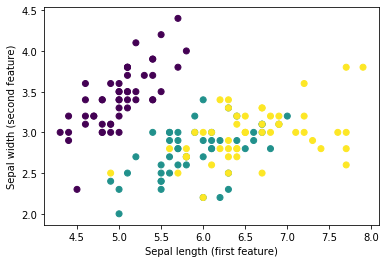

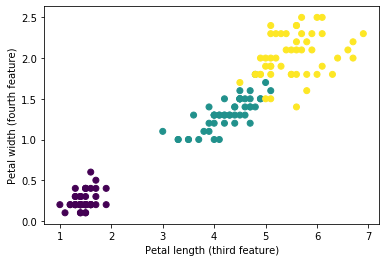

In [6]:
# From the Matplotlib library, import pyplot. We will refer to this library later as plt.
# This is a package for python that lets you create images and plot your data.
from matplotlib import pyplot as plt

# Create a scatterplot of the first two features, and use their labels as colour values.
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel('Sepal length (first feature)')
plt.ylabel('Sepal width (second feature)')
plt.show()
# Create a scatterplot of the third and fourth feature.
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
plt.xlabel('Petal length (third feature)')
plt.ylabel('Petal width (fourth feature)')
plt.show()

$\q{1.1}$ How are the points distributed? Could you fit a probability distribution that you know on this data (e.g. uniform, normal, etc.)?

## 2. Validation sets

Now that we have an idea what our dataset looks like, our goal is to create a model that will predict the class of each flower based on its attributes. In order to evaluate how well the model fits, we will also need a validation set where we can test some of our predictions. For this, we will split the data randomly in a train and validation set.

$\ex{2.1}$ Use the code below to split the dataset into a train and validation set.

__Tip__ we use the function `train_test_split`. It is easy to confuse the test set with the validation set, but it is important to separate the two: you can use your validation set when you are creating and adjusting your model. In the contrary, the test set is only to be used after you are done adjusting your model. If you change your model to better fit the test set, you risk overfitting on the data that you have. In other words: you perform well on the data you know, but might do really bad on data you don't know.

In [7]:
from sklearn.model_selection import train_test_split #to split in train and test set

# load the data and create the training and test sets
iris = datasets.load_iris()
# X is the feature vectors for the data points, and y is the target (ground truth) class for those data points 
#  the iris.data and iris.target entries are randomly divided into training and validation sets.
X_train, X_validation, y_train, y_validation = train_test_split(iris.data, iris.target, test_size=0.3) 

## 3. Univariate model

Looking at the plots of the data from the previous section, you might assume that separating the different classes would be a lot easier based on the petal data (3rd and 4th variable) than on the sepal data (1st and 2nd variable), as it is easier to distinguish the different clusters in that plot. In fact, for now we will only focus on one variable, the petal length (3rd variable), as it looks like it might be useful just on its own and this will simplify the model a lot.

Let's first take a look at the distribution of flowers along this variable to confirm that our assumption of a normal distribution is correct.

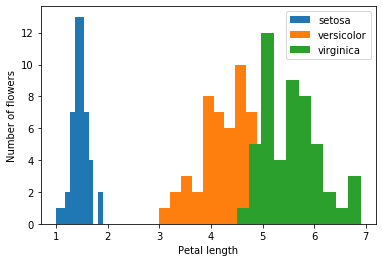

In [10]:
plt.hist(iris.data[:50, 2], label=iris.target_names[0])
plt.hist(iris.data[50:100, 2], label=iris.target_names[1])
plt.hist(iris.data[100:150, 2], label=iris.target_names[2])
plt.xlabel('Petal length')
plt.ylabel('Number of flowers')
plt.legend()

That looks about correct! Now, let's find the parameters of the normal distribution that describe our data best. The parameters that we need to find are the mean and standard deviation. 

$\ex{3.1}$ Using the training data from each of 3 classes, compute the mean ($\mu$) and standard deviation ($\sigma$) for the *pedal length* attribute. The Maximum Likelihood Estimators for these are given by

(3.1) $$\mu = \frac{\sum_{t=1}^Nx^t}{N}$$

(3.2) $$\sigma = \sqrt{\frac{\sum_{t=1}^N(x^t - m)^2}{N}}$$

__Hint__ Try to use numpy's functions to perform operations on your input (e.g. `np.sum`, `np.sqrt`)

In [14]:
def compute_mean(x):
    mean = 0
    mean = np.mean(x)
    return mean
    
def compute_sd(x, mean):
    sd = 0
    sd = np.sqrt(np.sum((x - mean)**2) / len(x))
    return sd


# Separate the dataset into the three flower types.
x_0 = X_train[np.where(y_train == 0)]
x_1 = X_train[np.where(y_train == 1)]
x_2 = X_train[np.where(y_train == 2)]

# Compute the mean for each flower type.
mean_0 = compute_mean(x_0[:, 2])
mean_1 = compute_mean(x_1[:, 2])
mean_2 = compute_mean(x_2[:, 2])

# Compute the standard deviation for each flower type.
sd_0 = compute_sd(x_0[:, 2], mean_0)
sd_1 = compute_sd(x_1[:, 2], mean_1)
sd_2 = compute_sd(x_2[:, 2], mean_2)

# Print the computed means and standard deviations.
print(mean_0, mean_1, mean_2)
print(sd_0, sd_1, sd_2)

1.4586206896551726 4.254054054054055 5.569230769230769
0.19031234105581557 0.46707519771595934 0.5866698045460282


$\q{3.1}$ Do these mean values and standard deviations correspond to the histograms that we plotted? If not, try to fix your code.

## 4. Probability density function

The probability density function for a Gaussian distribution is defined as

(4.1) $$p(x|\mu, \sigma)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

where $X$ is Gaussian (normal) distributed with mean $\mu$ and variance $\sigma^2$, denoted as $\mathcal{N}(\mu, 
\sigma^2$).

That means that if we have estimates for $\mu$ and $\sigma$, we can compute the probability density for a specific value $x$.

$\ex{4.1}$ Implement the `normal_PDF` function below. Given `x`, `mean`, and `sd`, we want to return the result of $p(x|\mu, \sigma)$. Your PDF is plotted. Play around with different configurations of `mean` and `sd` to see how these parameters influence your normal distribution.

Your pdf function outcome:  0.008863696823876015  Scipy's function outcome:  0.008863696823876015


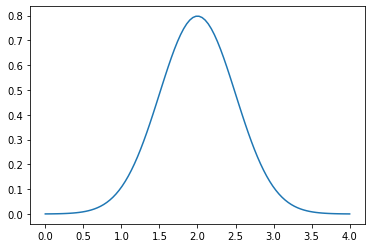

In [15]:
from scipy.stats import norm

def normal_PDF(x, mean, sd):
    pdf = 0
    num = np.exp(-1/2 * ((x-mean)**2/ (sd**2)))
    den = np.sqrt(2* np.pi * sd**2)
    return num/den

# Set x, mean and standard deviation
x = 0.5
mean = 2
sd = 0.5
my_pdf = normal_PDF(x, mean, sd)

# You can compare your outcome to scipy's built-in normal PDF
scipy_pdf = norm.pdf(x, mean, sd)
print("Your pdf function outcome: ", my_pdf, " Scipy's function outcome: ", scipy_pdf)

# And we plot the result of your PDF function for 100 points between 0 and 4: np.linspace(0, 4, 100)
xs = np.linspace(0, 4, 100)
plt.plot(xs, normal_PDF(xs, mean, sd))
plt.show()

We already made estimates for $\mu$ and $\sigma$ for the *petal length* for each of the 3 classes, so we can now define PDFs for each separate class.

$\ex{4.2}$ Plot the 3 functions using [linspace](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html) for a range of x-values aside the histograms of the classes.

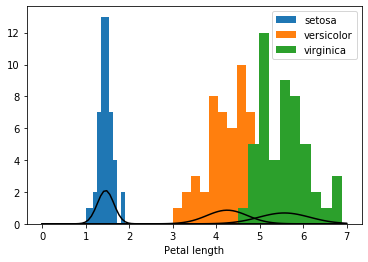

In [16]:
# Histograms of the flower types
plt.hist(iris.data[:50, 2], label=iris.target_names[0])
plt.hist(iris.data[50:100, 2], label=iris.target_names[1])
plt.hist(iris.data[100:150, 2], label=iris.target_names[2])

# Plot your PDFs here, using mean_{0..2}, sd_{0..2}
xs = np.linspace(0, 7, 100)
plt.plot(xs, normal_PDF(xs, mean_0, sd_0), c='k')
plt.plot(xs, normal_PDF(xs, mean_1, sd_1), c='k')
plt.plot(xs, normal_PDF(xs, mean_2, sd_2), c='k')

plt.xlabel('Petal length')
plt.legend()
plt.show()

$\q{4.1}$ Do your distributions and the histogram overlap? In what ways are the histogram and the probability distributions different?

__Hint__ The histogram shows the number of flowers that have a petal length within a certain window (bin). That means the values shown in the histogram are absolute counts.

## 5. Posterior probabilities

The plot above shows the probability densities for a value $x$. For a normal distribution of a class, you only need to know the mean and the standard deviation to be able to determine the probability that a data point $x$ is from a class provided $C_i$, i.e. $p(x | \mu_i, \sigma_i)$ ; e.g. the probability that an unknown fruit is an apple given the apples' class distribution. This is equivalent to the probability density given that specific class, i.e. $p(x | C_i)$.

$\q{5.1}$ Stop for a moment to try and understand what this probability means: $p(x | C_i)$.

__Hint__ The $|$ sign in $p(x | C_i)$ means: given that.


However, what would be useful for classification, is the posterior probabilities of the classes given the data, i.e. $P(C_i | x)$.

$\q{5.2}$ Can you explain this mathematical formulation in your own words?

$\q{5.3}$ Why is it helpful to know the posterior probability?

__Hint__ What information do we have for test points coming in?


To get the posterior probability, we can use Bayes' rule:

(5.1) $$P(C_i | x) =  \frac{p(x | C_i) P(C_i)}{p(x)} = \frac{p(x | C_i) P(C_i)}{\sum_{k=1}^K p(x | C_k) P(C_k)}$$

Because here we have no prior knowledge of the distribution of the different classes, we can just assume all prior class probabilities $P(C_i)$ to be equal. For our 3 class problem, that would mean a probability of $\frac{1}{3}$ for each class, but we can also just factor the common prior out of the equation and simplify to

$$P(C_i | x) = \frac{p(x | C_i)}{\sum_{k=1}^K p(x | C_k)}$$


$\ex{5.1}$ Finish the code to compute the posterior probability of a point $x$, given the mean, standard deviation, and class index.

__Tip__ The mean and standard deviation are given as arrays. You can access the mean for class `i` with `mean[i]`.

In [23]:
def posterior(x, means, sds, i):
    """
    Compute the posterior probabiliy P(C_i | x).
    :param x: the sample to compute the posterior probability for.
    :param means: an array of means for each class.
    :param sds: an array of standard deviation values for each class.
    :param i: the index of the class to compute the posterior probability for.
    """
    # First we compute the probability density function for class i
    # STUDENT
    num = normal_PDF(x, means[i], sds[i])
   
    
    # Next, we compute the sum of pdfs and use this to calculate the posterior probability
    # STUDENT
    den = normal_PDF(x, means[0], sds[0]) + normal_PDF(x, means[1], sds[1]) + normal_PDF(x, means[2], sds[2])
    return num/den
        
    
means = [mean_0, mean_1, mean_2]
sds = [sd_0, sd_1, sd_2]

# Test out the code
i = 2
flower_id = 2
x_post = posterior(X_train[flower_id, 2], means, sds, i) 

print("Posterior probability for class", iris.target_names[i], ": ", x_post)
print("Flower belongs to class", iris.target_names[y_train[flower_id]])

Posterior probability for class virginica :  1.4546606860626133e-12
Flower belongs to class setosa


$\ex{5.2}$ Plot the posterior probabilities for all 3 classes. Does the plot of these 3 posteriors make sense based on the data?

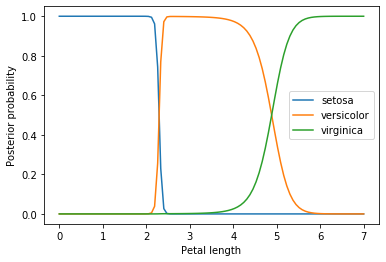

In [24]:
xs = np.linspace(0, 7, 100)
plt.plot(xs, posterior(xs, means, sds, 0), label=iris.target_names[0])
plt.plot(xs, posterior(xs, means, sds, 1), label=iris.target_names[1])
plt.plot(xs, posterior(xs, means, sds, 2), label=iris.target_names[2])
plt.xlabel('Petal length')
plt.ylabel('Posterior probability')
plt.legend()
plt.show()

$\q{5.4}$ Where would you put the decision boundary for each class? In other words: where would you draw the line, separating each class. Could you formulate this mathematically?

## 6. Bayes Classifier

Now that we can compute the posteriors for every class, constructing a classifier is easy. The Bayes classifier is defined as

- Classify as $C_i$ for which: $i = argmax_i\ P(C_i |x)$

$\ex{6.1}$ Write the code for the `classify` function. It should classify a single data point $x$ as one of the 3 classes, returning $0$, $1$ or $2$ based on the class the flower is most likely to belong to. The other arguments of the function should therefore be the vector of mean estimates `means` and the vector of standard deviation estimates `sds`, where index `i` corresponds to class $C_i$.

In [28]:
def classify(x, means, sds):
    # STUDENT
    prob0 = posterior(x, means, sds, 0)
    prob1 = posterior(x, means, sds, 1)
    prob2 = posterior(x, means, sds, 2)
    
    
    maxProb = max(prob0, prob1, prob2)
    if (maxProb == prob0):
        return 0
    elif(maxProb == prob1):
        return 1
    else:
        return 2

# Test out the code
flower_id = 8
predicted_class = classify(X_train[flower_id, 2], means, sds) 

print("Predicted class", iris.target_names[predicted_class])
print("Flower belongs to class", iris.target_names[y_train[flower_id]])

Predicted class versicolor
Flower belongs to class versicolor


$\ex{6.2}$ Finally, complete the `validate` function below. It should take a validation set, the expected class (ground truth; correct classifications of each element in the validation set) for all data points in that set and the vectors `means` and `sds` with which to calculate the classifications (decides which class each point belongs to) based on the distributions learnt from the training set. The function should return the percentage of elements in the validation set that were classified correctly.

__Hint__ You will only need to use the *petal length* variable from each data point to attempt to classify it (since that is how we trained our model).

In [41]:
def validate(X_validation, target, means, sds):
    preds = []
    # STUDENT
    for i in X_validation:
        calc = classify(i, means, sds)
        preds.append(calc)
    
    res = np.array(preds)
    
    match = 0 
    for ind,t in enumerate(target):
        if (t == res[ind]):
            match+=1
    return match / len(res)
    
validate(X_validation[:, 2], y_validation, means, sds)


0.9111111111111111

Let's return to our scatterplots and see how your classifier makes decisions. For this, we also plot the decision boundary. The function to create the decision boundaries does this in a very simple way:
- For each class, compute the posterior for 1000 points between 1 and 7
- If for any two classes the posteriors are equal at a point, add that point to the list of decision boundaries
- Plot vertical lines at these points

$\q{6.1}$ This method is quite complicated. Could you analytically solve the equations? __Hint__ You have to find the $x$ for which the class probabilities are equal. You can formulate this equatlity with the probability functions and solve that equation.

In [ ]:
def decision_boundary(means, sds):
    decision_boundaries = []
    for x in np.linspace(1, 7, 1000):
        posteriors = []
        for i in range(3):
            posteriors.append(posterior(x, means, sds, i))
        if ((np.abs(posteriors[0] - posteriors[1]) < 1e-4 and posteriors[0] > 1e-5 and posteriors[1] > 1e-5) or 
            (np.abs(posteriors[0] - posteriors[2]) < 1e-4 and posteriors[0] > 1e-5 and posteriors[2] > 1e-5) or
            (np.abs(posteriors[1] - posteriors[2]) < 1e-2 and posteriors[1] > 1e-5 and posteriors[2] > 1e-5)):
            decision_boundaries.append(x)
    return decision_boundaries

# Create a scatterplot of the third and fourth feature.
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
plt.xlabel('Petal length (third feature)')
plt.ylabel('Petal width (fourth feature)')
decision_boundaries = decision_boundary(means, sds)
for boundary in decision_boundaries:
    plt.axvline(x=boundary)

plt.show()